<a href="https://colab.research.google.com/github/giorginolab/MD-Tutorial-Data/blob/main/notebooks/2_MDTraj_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MD analysis: Gelsolin WT/mutant, apo/nanobody example 
*Toni Giorgino, IBF-CNR, Italy* - www.giorginolab.it

This is a Python notebook, based on Google Colaboratory platform. For an introduction to the platform, see [here](https://colab.research.google.com/notebooks/welcome.ipynb). You will be able to edit Python statements on this notebook by entering them into "cells", and execute them with the "play" button.

Notes:
 * The order of execution matters, not the order of display. 
 * To start from scratch, restart the runtime. 
 * Shell commands: prefix with an ! symbol.  E.g. `!ls -l` lists the contents of the current directory.
 * If you don't have a Google account, you may copy-paste the  statements in  local Python installations.
 * To plot, see examples [here](https://colab.research.google.com/notebooks/charts.ipynb).

The class is based on the following paper:

> Giorgino T, Analysis libraries for molecular trajectories: a cross-language synopsis. Chapter 20 in:  Biomolecular Simulations: Methods and Protocols Edited by M. Bonomi and C. Camilloni (Springer, ISBN 978-1-4939-9608-7).  [Preprint here](https://github.com/giorginolab/preprints-repository/tree/master/analysis_libraries_chapter)

and on the biological example from:

> Giorgino T, Mattioni D, Hassan A, Milani M, Mastrangelo E, Barbiroli A, et al. Nanobody interaction unveils structure, dynamics and proteotoxicity of the Finnish-type amyloidogenic gelsolin variant. Biochimica et Biophysica Acta (BBA) - Molecular Basis of Disease. 2019 Mar 1;1865(3):648–60. [Journal version](https://www.sciencedirect.com/science/article/pii/S0925443919300109?via%3Dihub). [Preprint here](https://arxiv.org/abs/1903.07308).





# Retrieve simulation trajectories

This copies data on the server which is running the calculations (not your computer). See below to download files to your PC.

In [6]:
%pwd

'/content'

In [7]:
# Get the data files if not there yet
! [ -f MD-Tutorial-Data ] || git clone https://github.com/giorginolab/MD-Tutorial-Data.git

fatal: destination path 'MD-Tutorial-Data' already exists and is not an empty directory.


In [8]:
%ls -l MD-Tutorial-Data/GSN

total 66820
-rw-r--r-- 1 root root  3505896 May 15 22:21 D187N+Nb-run.pdb
-rw-r--r-- 1 root root  4938249 May 15 22:21 D187N+Nb-run.psf
-rw-r--r-- 1 root root  9578580 May 15 22:21 D187N+Nb-run-subset.xtc
-rw-r--r-- 1 root root  2086286 May 15 22:21 D187N-run.pdb
-rw-r--r-- 1 root root  2877716 May 15 22:21 D187N-run.psf
-rw-r--r-- 1 root root  8284912 May 15 22:21 D187N-run-subset.xtc
-rw-r--r-- 1 root root      670 May 15 22:21 load-all.vmd
-rw-r--r-- 1 root root  3505653 May 15 22:21 WT+Nb-run.pdb
-rw-r--r-- 1 root root  4937615 May 15 22:21 WT+Nb-run.psf
-rw-r--r-- 1 root root 14860688 May 15 22:21 WT+Nb-run-subset.xtc
-rw-r--r-- 1 root root  2086286 May 15 22:21 WT-run.pdb
-rw-r--r-- 1 root root  2877395 May 15 22:21 WT-run.psf
-rw-r--r-- 1 root root  8856064 May 15 22:21 WT-run-subset.xtc


# Download results to your PC

To download any file (not necessary, but may be useful to inspect results), use the little "folder" icon on the left.

# Install Python libraries

Should be done via either pip or conda. We may already have them.

In [9]:
%pip install mdtraj
# %pip install mdanalysis
# %pip install moleculekit


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mdtraj: filename=mdtraj-1.9.7-cp310-cp310-linux_x86_64.whl size=7957829 sha256=c05ab81e5b3812e260396e92af524e8fcf8380d43dc855e1f50c55040079d8a6
  Stored in directory: /root/.cache/pip/wheels/ad/55/84/3b6abc1f4021160d8b6b876a9ed69148344f57bc443c1d2dd3
Successfully built mdtraj



## Analysis starts here

We will make use of Python (and its Numpy library) functions to answer a series of questions. 

Rewriting them in one of the other libraries and languages may be an useful exercise.

In [10]:
import mdtraj as mdt
# import MDAnalysis as mda
# import moleculekit as mk
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# The file set we plan to analyze. In this case it may be WT, WT+Nb, 
# D187N, D187N+Nb .

pdb="MD-Tutorial-Data/GSN/WT+Nb-run.pdb"
xtc="MD-Tutorial-Data/GSN/WT+Nb-run-subset.xtc"

# psf="WT+Nb-run.psf"  # but we don't use this one


In [12]:
m=mdt.load(xtc, top=pdb)

In [13]:
m

<mdtraj.Trajectory with 80 frames, 43279 atoms, 13539 residues, and unitcells at 0x7f69eae95420>

# Exercises

Write code to answer the following questions

## Residues?

How is it possible that there are so many "residues"?

## How many chains are there? 

Note that these are simulation structures, and may use chains for different purposes than crystallographic structures. We extract actual chain information from each atom's property. [Note:  MDAnalysis has another classification called "Segments", which mostly, but not entirely, overlaps chains.]

In [17]:
#@title Answer... {display-mode: "form"}

m.n_chains


9

## How many residues and atoms per each chain?

Hint: use

    for c in m.topology.chains:
        # do something with c

In [ ]:
#@title Solution... {display-mode: "form"}
 
for c in m.topology.chains:
    print(f"Chain {c} has {c.n_residues} residue, {c.n_atoms} atoms")  # QUESTION

## How many Cα atoms?

In [ ]:
# Write your answer here


In [ ]:
#@title Solution... {display-mode: "form"}
len(list(m.topology.select("name CA")))

## Is your structure solvated? If so, remove solvent.

In [23]:
non_h2o = m.topology.select("not water")
len(list(non_h2o))

# ..... 


3520

In [24]:
#@title Solution... {display-mode: "form"}

m_nowater=m.atom_slice(non_h2o) #QUESTION

In [25]:
m_nowater.n_atoms

3520

## How many frames? How many nanoseconds?

In [ ]:
#@title Solution... {display-mode: "form"}
m_nowater.n_frames          #QUESTION

## Count how many species of ions and how many of each

In [26]:
resnames = np.unique([r.name for r in m.topology.residues])
print(resnames)

['ALA' 'ARG' 'ASN' 'ASP' 'CAL' 'CLA' 'CYS' 'GLN' 'GLU' 'GLY' 'HIS' 'HOH'
 'ILE' 'LEU' 'LYS' 'MET' 'PHE' 'PRO' 'SER' 'SOD' 'THR' 'TRP' 'TYR' 'VAL']


Hint: use the following

`for ion in ["CAL","CLA","SOD"]:`

In [28]:
#@title Solution... {display-mode: "form"}
for ion in ["CAL","CLA","SOD"]:
    ions = [a.index for a in m_nowater.topology.atoms if a.residue.name == ion]    #QUESTION
    print(f"There are {len(ions)} atoms of type {ion}")



There are 2 atoms of type CAL
There are 31 atoms of type CLA
There are 25 atoms of type SOD


## Align to the G2's first frame

Now keep only chain D (chainid 3) and align to its frame 0. For atom selections, refer to https://www.mdtraj.org/1.9.8.dev0/atom_selection.html .

In [30]:
#@title Solution... {display-mode: "form"}
cD = m.topology.select("protein and chainid 3")           #QUESTION
mD = m.atom_slice(cD)                                     #QUESTION

In [31]:
align_idx = mD.topology.select("name CA and resid < 240")
mD.superpose(mD, 0, align_idx)

# In case you want to inspect
mD.save("check.pdb")
mD.save("check.xtc")

In [32]:
!ls -l

total 10552
-rw-r--r-- 1 root root 10307245 May 15 22:39 check.pdb
-rw-r--r-- 1 root root   486340 May 15 22:39 check.xtc
drwxr-xr-x 6 root root     4096 May 15 22:21 MD-Tutorial-Data
drwxr-xr-x 1 root root     4096 May 12 13:31 sample_data


## Inspect the shape of the coordinates. 

MDTraj uses frames x atoms x 3

In [33]:
mD.xyz.shape

(80, 1590, 3)

## Compute backbone global RMSD(t) 

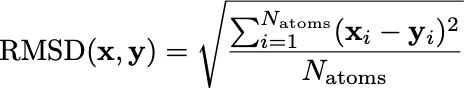

In [34]:
T = mD.n_frames
N = mD.n_atoms # CA only: 1 atom = 1 residue

rmsdT = np.zeros((T))
X = mD.xyz[0,:,:]  # First frame, all axes, all atoms

for t in range(T):
  Y = mD.xyz[t,:,:]  # Frame at t, all axes, all atoms
  d2 = (X-Y)**2   # This is still a matrix
  sd2 = np.sum(d2)/N
  rmsdT[t]=np.sqrt(sd2)

print(rmsdT)

[0.         0.18571684 0.19279617 0.19937792 0.20930439 0.20195992
 0.19775423 0.20287222 0.20987129 0.21433262 0.23114781 0.24478085
 0.23354026 0.23151626 0.24014235 0.22225498 0.21333124 0.22187131
 0.22903336 0.21742619 0.24297622 0.21857007 0.23659818 0.22402963
 0.21294931 0.2146992  0.23029839 0.21605924 0.21941129 0.2362667
 0.22704358 0.20575509 0.21718043 0.20619905 0.21831336 0.19549925
 0.20085825 0.22912071 0.21160366 0.22307779 0.18905819 0.2213949
 0.26002267 0.22072133 0.2394823  0.2310219  0.22811727 0.24265876
 0.26402941 0.25172198 0.22921845 0.24038019 0.23954612 0.234307
 0.22976189 0.22422403 0.214507   0.22445034 0.22689724 0.24613216
 0.22687389 0.22659689 0.24168384 0.26651086 0.26872967 0.26826362
 0.27221476 0.26492779 0.28507281 0.27993879 0.28830366 0.30161762
 0.26860167 0.27938768 0.29338744 0.293344   0.23696603 0.24666253
 0.276569   0.28754535]


Text(0, 0.5, 'Cα RMSD (Å)')

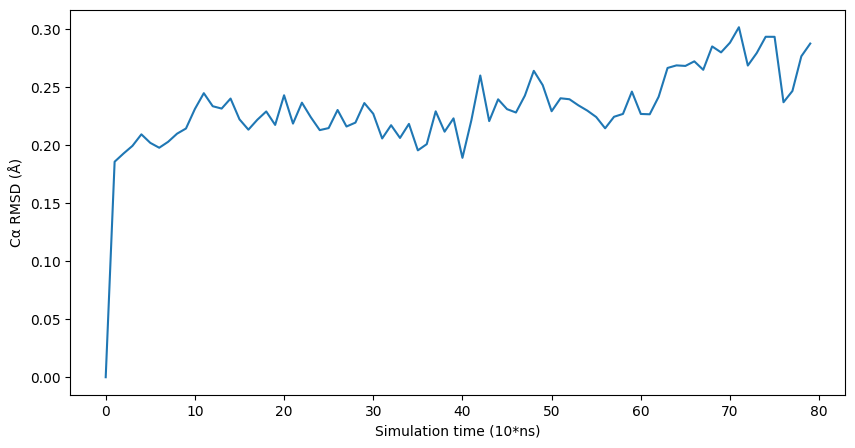

In [35]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(T), rmsdT)
plt.xlabel("Simulation time (10*ns)")
plt.ylabel("Cα RMSD (Å)")

## Compute displacements *by residue and time*.

In [36]:
rmsdRT = np.zeros((T,N))

for i in range(N):
  Xi = mD.xyz[0,i,:] # First frame, all axes, atom i
  for t in range(T):
    Yi = mD.xyz[t,i,:]  # Time t, atom i, 3D vector
    dist = np.sum((Xi-Yi)**2)   # Displacement^2
    rmsdRT[t,i]=np.sqrt(dist)

print(rmsdRT)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.10006325 0.11989453 0.04315599 ... 1.29152727 1.20302904 1.27812302]
 [0.13028522 0.23128945 0.12885949 ... 0.7852124  0.76311409 0.78415805]
 ...
 [0.15816055 0.19697951 0.08786053 ... 0.16796233 0.25669411 0.16283163]
 [0.39744967 0.48974702 0.51968575 ... 1.34624219 1.22654593 1.26326609]
 [0.13185498 0.15318839 0.23314857 ... 0.89744073 0.84258384 0.85937977]]


In [37]:
rmsdRT.shape

(80, 1590)

Text(0.5, 0, 'Time (ns/10)')

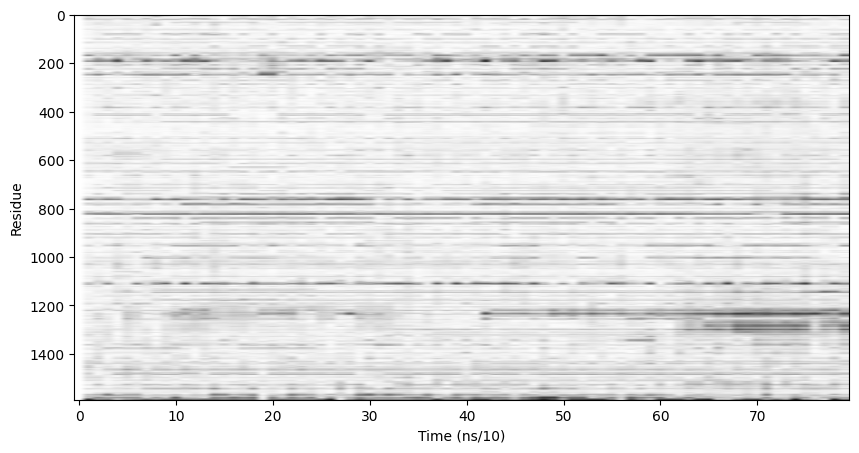

In [38]:
plt.figure(figsize=(10,5))
plt.imshow(rmsdRT.T, aspect="auto", cmap="binary")
plt.ylabel("Residue")
plt.xlabel("Time (ns/10)")

## Question

How to modify the code so that the vertical axis is *actually* residues?

**Hint:** No need to compute for all atoms of a residue.

## Average over time

Text(0, 0.5, 'Mean displacement (A)')

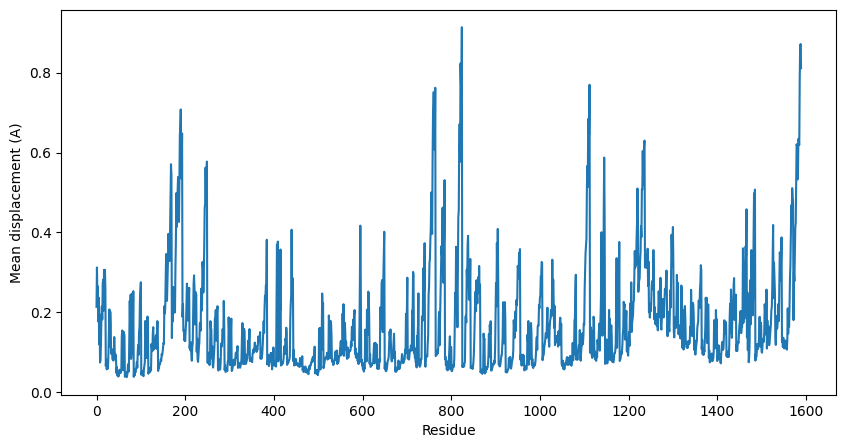

In [39]:
plt.figure(figsize=(10,5))
rmsdR = np.mean(rmsdRT,axis = 0) # <-- note: mean over axis 0, which is time
plt.plot(np.arange(N), rmsdR)
plt.xlabel("Residue")
plt.ylabel("Mean displacement (A)")